# Sana Shaikh - Assignment 3

## Problem 2: Face Recognition Using SVM and PCA: 

a) Download the dataset “Face” from this link:  https://drive.google.com/drive/folders/14Mi1I91iVQ13PG0SPjh9wN5NSNlBb3rb?usp=sharing (Links to an external site.)

Check out the dataset. This is an image dataset from AT&T research lab. It includes 400 faces (64x64 pixels) from 40 people (10 images per person).

You have to also download the csv file that includes the labels of the images (the label is person’s ID. The file is in the same folder). The goal is to build a Face Recognition algorithm to recognize each person using PCA dim-reduction and a non-linear SVM.

you can use:

mpimg.imread(file_name)   to load an image, and

plt.imshow(image_name, cmap=plt.cm.gray)  to show an image (This is a little different from what we had before!). Add   %matplotlib inline   at top of your code to make sure that the images will be shown inside the Jupyter explorer page.

In [83]:
import pandas as pd
import numpy as np

faces_df = pd.read_csv('/Users/sanarshaikh/Downloads/Face/label.csv')
faces_df.head()

,Label
0,13
1,30
2,34
3,19
4,24


In [84]:
columns = faces_df.columns
print (columns)

y = faces_df['Label']
#y[0::30]

faces_df.shape[0]

Index(['Label'], dtype='object')


400

In [85]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

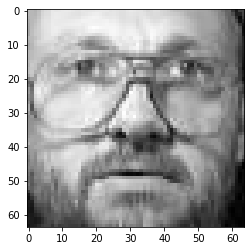

400


In [86]:
list = []
for i in range (0, 400):
    list.append(mpimg.imread('/Users/sanarshaikh/Downloads/Face/' + str(i) + '.jpg'))

plt.imshow(list[0], cmap = plt.cm.gray)
plt.show()
print(len(list))

b) Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 64x64 image into a row of the feature matrix with 4096 columns (i.e 4096 features for 4096 pixels).

In [87]:
features = []
for j in range(4096):
    features.append(str(j))
faces_df = pd.DataFrame(columns = features)

for k in range(400):
    pixels = list[k].flatten() #to flatten array of images to one dimension
    faces_df.loc[k] = pixels #to access rows of data using labels

faces_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,186,183,179,190,212,219,221,232,230,231,...,56,45,47,18,0,8,15,9,3,5
1,204,198,194,195,198,195,190,186,190,193,...,19,0,29,52,90,146,130,120,164,167
2,86,79,82,95,100,102,121,146,169,179,...,160,167,179,169,192,188,197,189,185,141
3,61,90,98,119,144,156,174,177,183,195,...,119,244,246,168,126,187,162,145,58,18
4,99,134,165,183,201,210,215,224,232,236,...,83,90,94,90,70,41,71,103,92,117


c) Normalize each column of your feature matrix using preprocessing.scale (This step is very important!).

In [88]:
X = faces_df
# y is already defined above

In [89]:
from sklearn import preprocessing

scale_X = preprocessing.scale(X)
scaled_X = pd.DataFrame(scale_X)

print(scaled_X.head())

       0         1         2         3         4         5         6     \
0  1.376496  1.118853  0.796104  0.763445  0.958018  0.942786  0.847410   
1  1.681134  1.365414  1.035702  0.843617  0.725408  0.521762  0.264739   
2 -0.315935 -0.590637 -0.753296 -0.759837 -0.902856 -1.109705 -1.032173   
3 -0.739042 -0.409826 -0.497725 -0.375008 -0.171799 -0.162401 -0.035994   
4 -0.095919  0.313420  0.572479  0.651203  0.775253  0.784902  0.734635   

       7         8         9     ...      4086      4087      4088      4089  \
0  0.960266  0.840342  0.820069  ... -0.710060 -0.846611 -0.792436 -1.207042   
1  0.020081 -0.018794 -0.027663  ... -1.423446 -1.628179 -1.105583 -0.636535   
2 -0.797471 -0.469840 -0.339985  ...  1.295133  1.272305  1.503976  1.326681   
3 -0.163868 -0.169142  0.016955  ...  0.504624  2.609654  2.669579  1.309901   
4  0.796756  0.883299  0.931612  ... -0.189481 -0.065044  0.025226  0.001091   

       4090      4091      4092      4093      4094      4095  
0 -1

d) Use sklearn functions to split the normalized dataset into testing and training sets with the following parameters: test_size=0.25, random_state=5.

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.25, random_state = 5)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(300, 4096)
(300,)
(100, 4096)
(100,)


e) The dimensionality of the data samples is 4096. Use PCA (Principal Component Analysis) to reduce the dimensionality from 4096 to 50 (i.e. only k=50 principal components!). You should “fit” your PCA on your training set only, and then use this fitted model to “transform” both training and testing sets (When you finish this step, the number of columns in your testing and training sets should be 50). You can use this format:

from  sklearn.decomposition  import  PCA

k = 50  #  k  is the number of components (new features) after dimensionality reduction

my_pca = PCA(n_components = k)

#### X_Train is feature matrix of training set before dimensionality reduction, 

#### X_Train_New is feature matrix of training set after dimensionality reduction:

X_Train_new = my_pca. fit_transform(X_Train)

X_Test_new = my_pca. transform(X_Test)

In [91]:
from sklearn.decomposition import PCA
k = 50 #(new features)
my_pca = PCA(n_components = k)

X_Train_new = my_pca.fit_transform(X_train)
X_Test_new = my_pca.transform(X_test)

print(X_Train_new.shape)
print(X_Test_new.shape)

(300, 50)
(100, 50)


f) Design and Train a non-linear SVM classifier with “RBF Kernel” to recognize the face based on the training dataset that you built. Use SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1). Then, Test your SVM on testing set, and calculate and report the accuracy. Also, calculate and report the Confusion Matrix using confusion_matrix(y_test, y_predict).

In [92]:
from sklearn.svm import SVC

my_SVM = SVC(C = 1, kernel = 'rbf', gamma = 0.0005, random_state = 1)

my_SVM.fit(X_Train_new, y_train)
y_predict = my_SVM.predict(X_Test_new)

In [93]:
from sklearn.metrics import accuracy_score

SVM_accuracy = accuracy_score(y_test, y_predict)
print("The SVM accuracy score is: ", SVM_accuracy)

The SVM accuracy score is:  0.91


In [94]:
from sklearn import metrics

cm_SVM = metrics.confusion_matrix(y_test, y_predict)

print("Confusion matrix: ")
print(cm_SVM)

Confusion matrix: 
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]


g) Now, use GridSearchCV to find the best value for parameter C in your SVM. Search in this list: [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5].

Important Note: Remember that in part (g), we want to use cross-validation method (GridSearchCV) to find the best C.  Thus, you don’t use the X_train and X_test anymore. You have to perform another PCA: for the sake of simplicity, this time you can do the PCA on the entire dataset after normalization (X_normalized_pca = my_pca.fit_transform(X_normalized)), where X_normalized is the entire dataset after normalization, and then use it in GridSearchCV with 10-fold cross validation to find C.

In [95]:
from sklearn.model_selection import GridSearchCV

C = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]
param_grid = dict(C = C)

X_normalized_pca = my_pca.fit_transform(scaled_X)

grid = GridSearchCV(my_SVM, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_normalized_pca, y)

GridSearchCV(cv=10, estimator=SVC(C=1, gamma=0.0005, random_state=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0,
                               50000.0, 100000.0]},
             scoring='accuracy')

In [96]:
print("The best parameter", grid.best_params_)
print("The best accuracy score is: ", grid.best_score_)

The best parameter {'C': 10}
The best accuracy score is:  0.9649999999999999
